In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [19]:
data = pd.read_csv('C:/Users/divya/Documents/air+quality/AIR QUALITY FILES/AirQualityUCI.csv', sep=';', decimal=',')


In [21]:
data = data.drop(columns=['Unnamed: 15', 'Unnamed: 16'])
data.head()


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [23]:
missing = data.isnull().sum()
print(missing)

data.replace(-200, np.nan, inplace=True)

data = data.dropna()  # For simplicity; you can also fill with mean


Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64


In [25]:
print(data.info()) 

<class 'pandas.core.frame.DataFrame'>
Index: 827 entries, 0 to 1230
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           827 non-null    object 
 1   Time           827 non-null    object 
 2   CO(GT)         827 non-null    float64
 3   PT08.S1(CO)    827 non-null    float64
 4   NMHC(GT)       827 non-null    float64
 5   C6H6(GT)       827 non-null    float64
 6   PT08.S2(NMHC)  827 non-null    float64
 7   NOx(GT)        827 non-null    float64
 8   PT08.S3(NOx)   827 non-null    float64
 9   NO2(GT)        827 non-null    float64
 10  PT08.S4(NO2)   827 non-null    float64
 11  PT08.S5(O3)    827 non-null    float64
 12  T              827 non-null    float64
 13  RH             827 non-null    float64
 14  AH             827 non-null    float64
dtypes: float64(13), object(2)
memory usage: 103.4+ KB
None


In [27]:
print(data.shape)        
print(data.columns)      
print(data.describe())   


(827, 15)
Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')
           CO(GT)  PT08.S1(CO)     NMHC(GT)    C6H6(GT)  PT08.S2(NMHC)  \
count  827.000000   827.000000   827.000000  827.000000     827.000000   
mean     2.353567  1207.879081   231.025393   10.771100     966.116082   
std      1.409496   241.816997   208.461912    7.418134     266.424557   
min      0.300000   753.000000     7.000000    0.500000     448.000000   
25%      1.300000  1017.000000    77.000000    4.800000     754.000000   
50%      2.000000  1172.000000   157.000000    9.100000     944.000000   
75%      3.100000  1380.000000   318.500000   14.800000    1142.500000   
max      8.100000  2040.000000  1189.000000   39.200000    1754.000000   

          NOx(GT)  PT08.S3(NOx)     NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  827.000000    827.000000  827.

In [29]:
print(data.isnull().sum())


Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


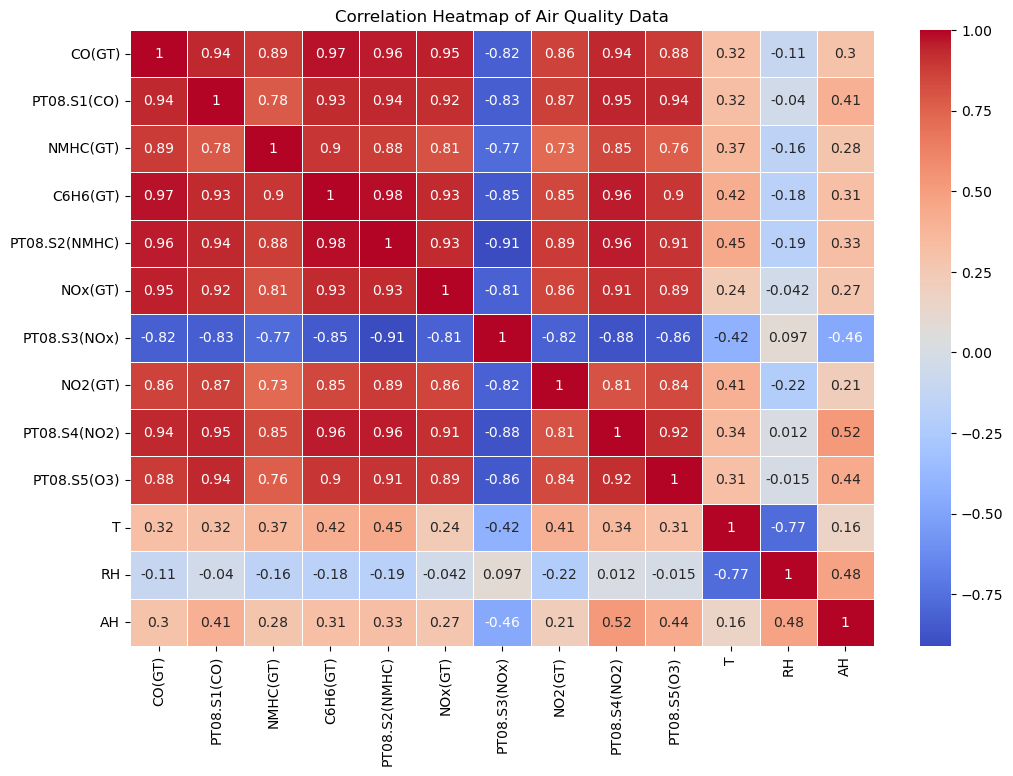

In [37]:
numeric_data = data.select_dtypes(include=[np.number])

plt.figure(figsize=(12,8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Air Quality Data')
plt.show()



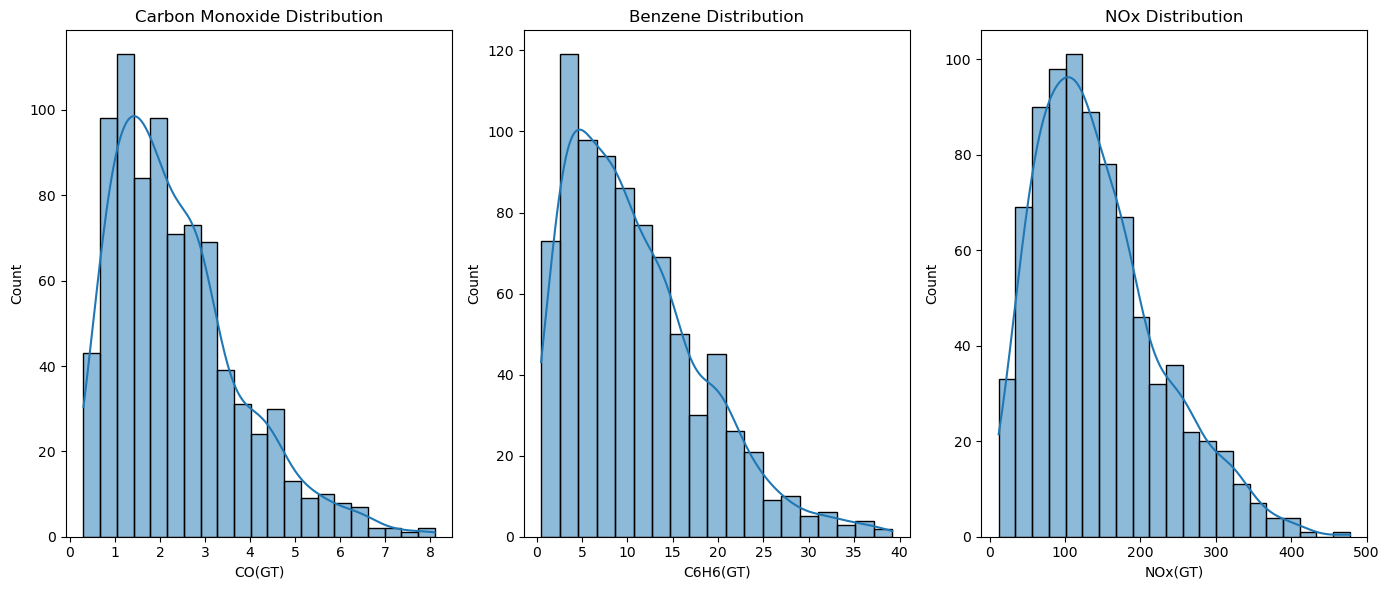

In [39]:
plt.figure(figsize=(14,6))

plt.subplot(1,3,1)
sns.histplot(data['CO(GT)'].dropna(), kde=True)
plt.title('Carbon Monoxide Distribution')

plt.subplot(1,3,2)
sns.histplot(data['C6H6(GT)'].dropna(), kde=True)
plt.title('Benzene Distribution')

plt.subplot(1,3,3)
sns.histplot(data['NOx(GT)'].dropna(), kde=True)
plt.title('NOx Distribution')

plt.tight_layout()
plt.show()


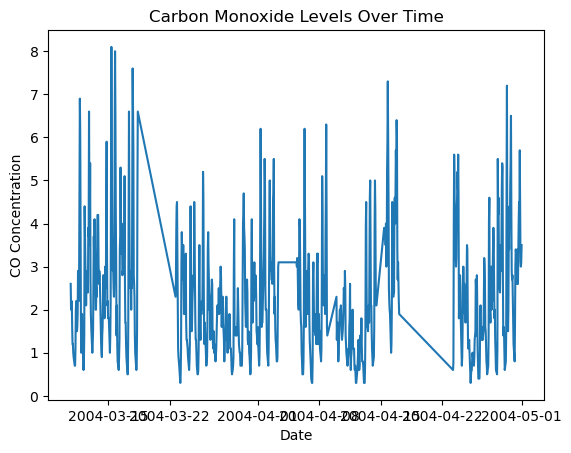

In [51]:
data['DateTime'] = pd.to_datetime(
    data['Date'] + ' ' + data['Time'], 
    format='%d/%m/%Y %H.%M.%S', 
    errors='coerce'
)
sns.lineplot(x='DateTime', y='CO(GT)', data=data)
plt.title('Carbon Monoxide Levels Over Time')
plt.xlabel('Date')
plt.ylabel('CO Concentration')
plt.show()


In [53]:
features = data.select_dtypes(include=[np.number]).drop(['CO(GT)'], axis=1)

target = data['CO(GT)']


In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)


In [59]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)


LinearRegression()

In [61]:
from sklearn.metrics import mean_squared_error, r2_score

predictions = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, predictions))
print("R^2 Score:", r2_score(y_test, predictions))


Mean Squared Error: 0.0579252942473794
R^2 Score: 0.9721733275987301


In [63]:
import joblib

joblib.dump(model, 'air_quality_model.pkl')


['air_quality_model.pkl']